## Problem Description

Predicting the Average wind power to be generated from the weather conditions available.
A precise forecast need to overcome problems of power production caused by Fluctuating weather conditions

# Objective 

* Regression: Predicting the power generated using features like temperature, wind speed, pressure etc.
* Time Series : Without knowing any details about the weather conditions predicting the power generation using time as feature 

## Dataset Description

Historical wind energy data is taken from NREL to do this analysis. 
wind power generation data is used in this experiment. 

# Wind Power Generation

In [116]:
# Libraries
import pandas as pd
import numpy as np
import math 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

import calendar  
from datetime import datetime, timedelta,date

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import statsmodels.api as sm

#Plotly for Interactive Visualization
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [117]:
df= pd.read_excel("WA_WIND_DATA.xlsx")
df.head()

,DateTime,Pressure | (atm),Wind direction | (deg),Wind speed | (m/s),Power generated by system | (kW)
0,2007-01-01 00:00:00,0.890467,104,3.429,0.00
1,2007-01-01 01:00:00,0.890583,106,3.579,0.00
2,2007-01-01 02:00:00,0.890366,102,4.307,1986.68
3,2007-01-01 03:00:00,0.890326,99,4.562,2597.61
4,2007-01-01 04:00:00,0.890549,98,4.553,2555.46


##### Features are timestamp, air temperature (C), pressure (atm), wind direction (deg), wind speed (m/s) and the target variable is Power generated by the system (kW). 

In [118]:
df.tail()

,DateTime,Pressure | (atm),Wind direction | (deg),Wind speed | (m/s),Power generated by system | (kW)
26275,2009-12-31 19:00:00,0.879789,125,14.532,53503.3
26276,2009-12-31 20:00:00,0.878944,127,14.591,53439.4
26277,2009-12-31 21:00:00,0.878314,124,14.706,53376.1
26278,2009-12-31 22:00:00,0.877968,122,12.766,53175.4
26279,2009-12-31 23:00:00,0.877938,119,11.319,51145.8


In [119]:
df['DateTime'].min()

Timestamp('2007-01-01 00:00:00')

In [120]:
df['DateTime'].max()

Timestamp('2009-12-31 23:00:00')

###### We have hourly data for about 3 years.

In [121]:
print(df.shape)
print(df.info())

(26280, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateTime                          26280 non-null  datetime64[ns]
 1   Pressure | (atm)                  26280 non-null  float64       
 2   Wind direction | (deg)            26280 non-null  int64         
 3   Wind speed | (m/s)                26280 non-null  float64       
 4   Power generated by system | (kW)  26280 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.0 MB
None


There are 26280 datapoints

### Expected Outcome
* Plot between Actual power generated and Predictions
* Hourly and Day-wise predictions

# Exploratory data Analysis

<AxesSubplot:>

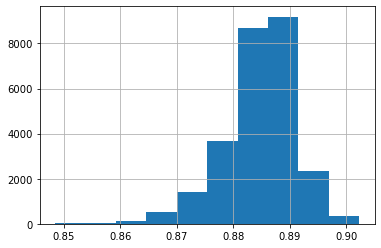

In [122]:
df['Pressure | (atm)'].hist()

<AxesSubplot:>

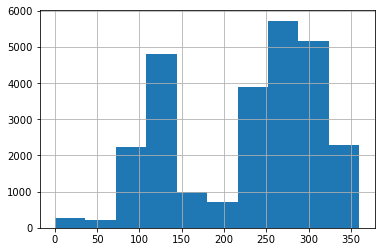

In [123]:
df['Wind direction | (deg)'].hist()

<AxesSubplot:>

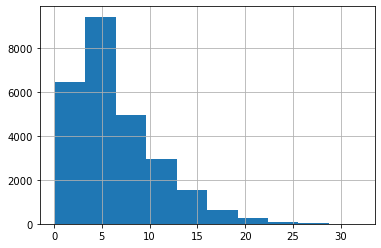

In [124]:
df['Wind speed | (m/s)'].hist()

<AxesSubplot:>

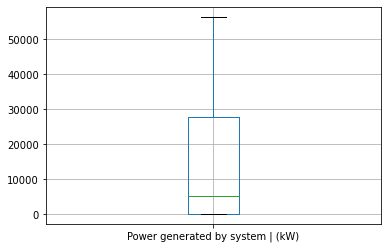

In [153]:
df.boxplot(column=['Power generated by system | (kW)'])

In [125]:
df.columns

Index(['DateTime', 'Pressure | (atm)', 'Wind direction | (deg)',
       'Wind speed | (m/s)', 'Power generated by system | (kW)'],
      dtype='object')

### Preprocessing

In [126]:
X=df[['Pressure | (atm)', 'Wind direction | (deg)',
       'Wind speed | (m/s)']]
y=df['Power generated by system | (kW)']
print(X.shape,y.shape)

(26280, 3) (26280,)


In [127]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=4)

In [128]:
print(X_train.shape,X_val.shape)

(18396, 3) (7884, 3)


In [129]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Modelling

### Regression 

Multiple Linear Regression

In [130]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
ypred = regression_model.predict(X_val)
mse = np.mean((ypred-y_val)**2)
print('RMSE value for Linear Regression:')
print(math.sqrt(mse))

RMSE value for Linear Regression:
7988.064813468996


In [131]:
print(regression_model.intercept_)

15476.71541617743


In [132]:
print(regression_model.coef_)

[  -84.77746839  -683.95879767 17742.06878455]


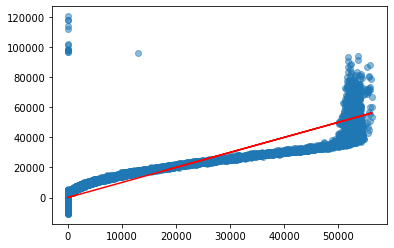

In [133]:
plt.scatter(y_val,ypred, alpha = 0.5)
plt.plot(y_val, y_val, color='r')

<AxesSubplot:>

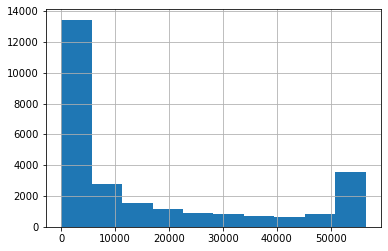

In [134]:
df['Power generated by system | (kW)'].hist()

 Lasso and Ridge Regression

In [135]:
alpha = [0.01, 0.1, 1.0, 10, 100]

RMSE_ridge=[]

for i in alpha:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    mse = np.mean((rr.predict(X_val)-y_val)**2)
    RMSE_ridge.append(math.sqrt(mse))
print(RMSE_ridge)

[7988.064264488276, 7988.059324299523, 7988.009985535112, 7987.52290234119, 7983.274718520733]


In [136]:
alpha = [0.01, 0.1, 1.0, 10, 100]

RMSE_lasso=[]

for i in alpha:
    lr = Lasso(alpha=i)
    lr.fit(X_train, y_train)
    mse = np.mean((lr.predict(X_val)-y_val)**2)
    RMSE_lasso.append(math.sqrt(mse))
print(RMSE_lasso)

[7988.064392579111, 7988.06060459842, 7988.031311000491, 7987.751275318342, 7986.2413462416835]


### Polynomial Regression

In [212]:
x=df[['Pressure | (atm)', 'Wind direction | (deg)',
       'Wind speed | (m/s)']]
y=df['Power generated by system | (kW)']
y = y[:, np.newaxis]

<ipython-input-212-ba9c1da025a1>:4: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [138]:
RMSE=[]
for i in range(1,5):
    polynomial_features= PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    RMSE.append(rmse)
    print(rmse)

7641.694859654264
6949.9423106381455
4289.664816317223
2759.0289035297105


In [213]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=4)

In [214]:
print(X_train.shape,X_val.shape)

(18396, 3) (7884, 3)


In [215]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [216]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X_train)
x_val_poly = polynomial_features.fit_transform(X_val)
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_val_poly)

In [217]:
rmse(y_val,y_poly_pred)

2840.778568116728

In [147]:
def rmse(act,pred):
    rmse = np.sqrt(mean_squared_error(act,pred))
    return rmse

# Day-wise Prediction

In [42]:
df.columns

Index(['DateTime', 'Pressure | (atm)', 'Wind direction | (deg)',
       'Wind speed | (m/s)', 'Power generated by system | (kW)'],
      dtype='object')

In [43]:
df['Date1'] = pd.to_datetime(df['DateTime'], format='%d/%m/%y')

In [44]:
df.head()

,DateTime,Pressure | (atm),Wind direction | (deg),Wind speed | (m/s),Power generated by system | (kW),Date1
0,2007-01-01 00:00:00,0.890467,104,3.429,0.00,2007-01-01 00:00:00
1,2007-01-01 01:00:00,0.890583,106,3.579,0.00,2007-01-01 01:00:00
2,2007-01-01 02:00:00,0.890366,102,4.307,1986.68,2007-01-01 02:00:00
3,2007-01-01 03:00:00,0.890326,99,4.562,2597.61,2007-01-01 03:00:00
4,2007-01-01 04:00:00,0.890549,98,4.553,2555.46,2007-01-01 04:00:00


In [72]:
df1=df.copy()

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   DateTime                          26280 non-null  datetime64[ns]
 1   Pressure | (atm)                  26280 non-null  float64       
 2   Wind direction | (deg)            26280 non-null  int64         
 3   Wind speed | (m/s)                26280 non-null  float64       
 4   Power generated by system | (kW)  26280 non-null  float64       
 5   Date1                             26280 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 1.2 MB


In [174]:
Pressure=pd.DataFrame(df1.groupby('Date1')['Pressure | (atm)'].mean())
Wind_dir=pd.DataFrame(df1.groupby('Date1')['Wind direction | (deg)'].mean())
Wind_speed=pd.DataFrame(df1.groupby('Date1')['Wind speed | (m/s)'].mean())
Power_Gen=pd.DataFrame(df1.groupby('Date1')['Power generated by system | (kW)'].sum())

In [176]:
DW=Pressure.join(Wind_dir).join(Wind_speed)
DW['Power_Gen']=Power_Gen

In [177]:
DW.head()

,Pressure | (atm),Wind direction | (deg),Wind speed | (m/s),Power_Gen
Date1,,,,
2007-01-01,0.889877,122.208333,4.400042,61382.799
2007-01-02,0.881891,233.458333,17.772625,1150244.400
2007-01-03,0.873756,245.500000,11.297833,1058432.400
2007-01-04,0.876742,259.958333,10.685833,977366.800
2007-01-05,0.888402,265.708333,11.801833,917531.280


In [199]:
x=DW[['Pressure | (atm)', 'Wind direction | (deg)',
       'Wind speed | (m/s)']]
y=DW['Power_Gen']
print(X.shape,y.shape)

(1095, 3) (1095,)


In [200]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=4)

In [201]:
print(X_train.shape,X_val.shape)

(766, 3) (329, 3)


In [202]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [205]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X_train)
x_val_poly = polynomial_features.fit_transform(X_val)
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_val_poly)

In [206]:
rmse(y_val,y_poly_pred)

68855.55880708969

# Analysis

Using Polynomial Regression gave better predictions for both hour-wise and day-wise Predictions

# Time Series Prediction

In [191]:
df2=pd.DataFrame(df1.groupby('Date1')['Power generated by system | (kW)'].sum())
df2.head()

,Power generated by system | (kW)
Date1,
2007-01-01,61382.799
2007-01-02,1150244.400
2007-01-03,1058432.400
2007-01-04,977366.800
2007-01-05,917531.280


In [192]:
df2.reset_index(inplace=True)

In [193]:
df2.tail()

,Date1,Power generated by system | (kW)
1090,2009-12-27,1294732.60
1091,2009-12-28,577697.30
1092,2009-12-29,354843.71
1093,2009-12-30,660261.70
1094,2009-12-31,724200.27


In [194]:
#plot monthly sales
plot_data = [
    go.Scatter(
        x=df2['Date1'],
        y=df2['Power generated by system | (kW)'],
    )
]
plot_layout = go.Layout(
        title='Daily Power Generated'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [195]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date1                             1095 non-null   object 
 1   Power generated by system | (kW)  1095 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


<Figure size 432x288 with 0 Axes>

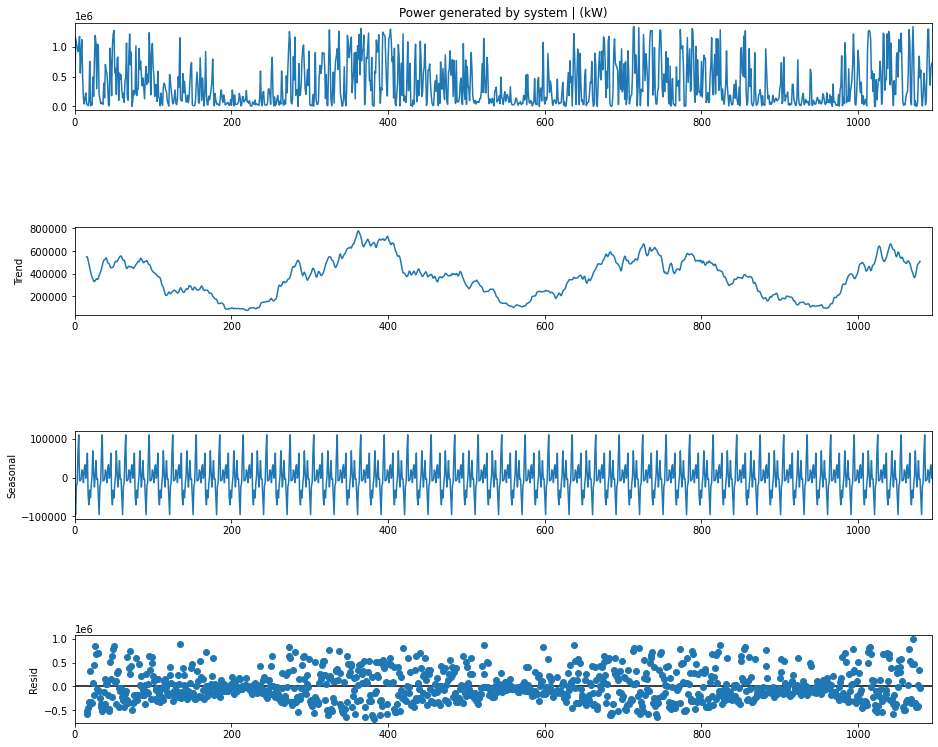

In [196]:
result =  sm.tsa.seasonal_decompose(df2['Power generated by system | (kW)'], model='additive', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [197]:
df2['sm3']=df2['Power generated by system | (kW)'].rolling(window=1).mean().shift(1)
df2.head(3)

,Date1,Power generated by system | (kW),sm3
0,2007-01-01,61382.799,NaN
1,2007-01-02,1150244.400,61382.799
2,2007-01-03,1058432.400,1150244.400


<AxesSubplot:>

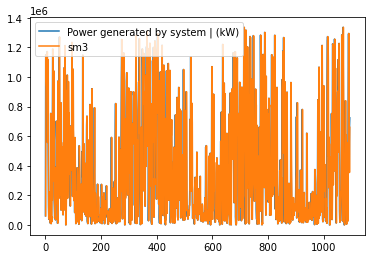

In [198]:
df2.plot()

### References

https://machinelearningmastery.com/make-sample-forecasts-arima-python/

https://machinelearningmastery.com/category/time-series/

https://www.kaggle.com/dickbrown/german-wind-power
